In [158]:
# import the necessary libraries

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

# Data Import, EDA and Pre-Processing

In [159]:
house_data = pd.read_csv("datasets/kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [160]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [161]:
incident_data = pd.read_csv("datasets/KCSO_Incident_Dataset__Historic_to_2019.csv")
incident_data.head()

,case_number,incident_datetime,incident_type,FCR,address_1,city,state,zip,created_at,updated_at,hour_of_day,day_of_week,Incident Block Location
0,C19046940,12/09/2019 09:02:00 AM,Other,503,1 Block AVE & YESLER WAY,SEATTLE,WA,98104,12/12/2019 06:19:00 PM,12/12/2019 08:07:00 PM,9,Monday,NaN
1,C19046039,12/02/2019 06:01:00 PM,Other,162,19700 Block 635TH PL NE,BARING,WA,98224,12/05/2019 05:15:00 PM,12/05/2019 07:06:00 PM,18,Monday,NaN
2,C19026684,07/14/2019 01:29:00 AM,Vehicle Recovery,311,1 Block PL S & DES MOINES MEMORIAL DR S,BURIEN,WA,98168,07/15/2019 05:45:00 AM,07/15/2019 06:09:00 PM,1,Sunday,NaN
3,C19043968,11/16/2019 10:07:00 PM,Traffic,404,RAINIER AVE N & RENTON AVE S,SKYWAY,WA,98178,11/19/2019 04:30:00 PM,11/19/2019 06:16:00 PM,22,Saturday,NaN
4,C19042199,11/04/2019 07:18:00 AM,Property Crime,313,1 Block PL S & DES MOINES MEMORIAL DR S,BURIEN,WA,98168,11/05/2019 04:35:00 PM,11/05/2019 06:26:00 PM,7,Monday,NaN


In [162]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20449 entries, 0 to 20448
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   case_number              20449 non-null  object
 1   incident_datetime        20449 non-null  object
 2   incident_type            20449 non-null  object
 3   FCR                      20449 non-null  int64 
 4   address_1                20449 non-null  object
 5   city                     20449 non-null  object
 6   state                    20449 non-null  object
 7   zip                      20133 non-null  object
 8   created_at               20449 non-null  object
 9   updated_at               20449 non-null  object
 10  hour_of_day              20449 non-null  int64 
 11  day_of_week              20449 non-null  object
 12  Incident Block Location  17713 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.0+ MB


In [163]:
clean_date = house_data.date.apply(lambda x: x.split('T')[0])
clean_date

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

In [164]:
# replace date column with the clean_date

house_data["date"] = clean_date
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [165]:
# convert price to integers as pennies are irrelevant when dealing with high prices

house_data.price = house_data.price.astype(np.int64)

In [166]:
# check to see if price has been converted to integer

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [167]:
# select columns to plot to check for outliers using scatterplots

cols_to_plot = house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

Graph for Price: Total = 4028


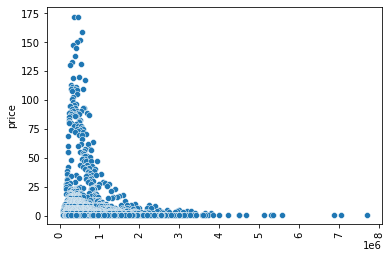

Graph for Bedrooms: Total = 13


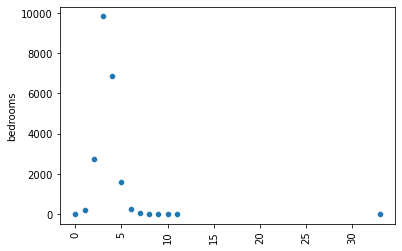

Graph for Bathrooms: Total = 30


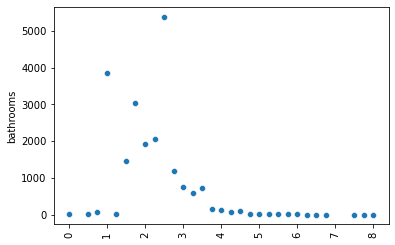

Graph for Sqft_living: Total = 1038


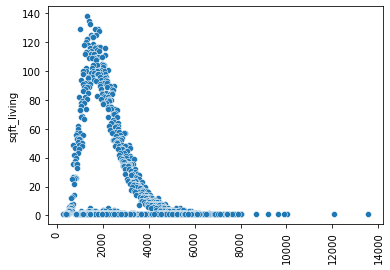

Graph for Sqft_lot: Total = 9782


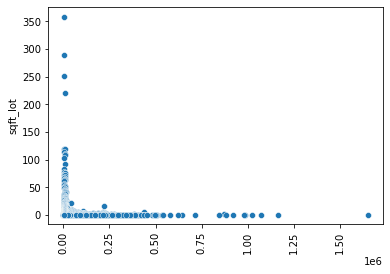

Graph for Floors: Total = 6


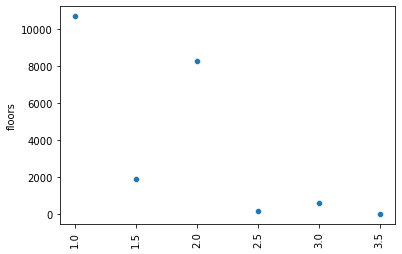

Graph for Waterfront: Total = 2


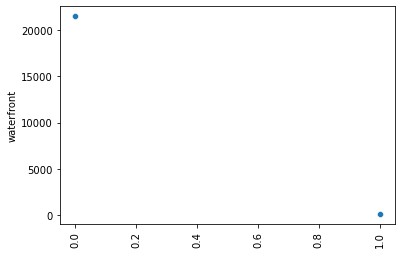

Graph for View: Total = 5


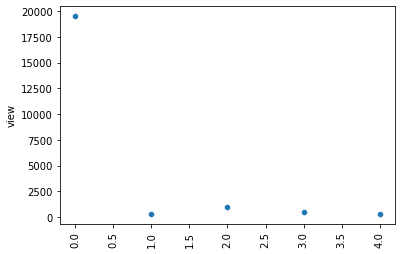

Graph for Condition: Total = 5


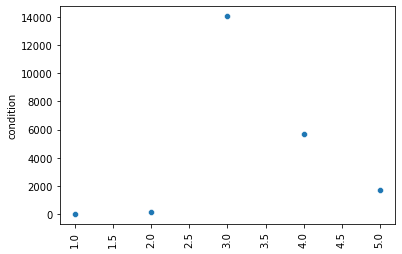

Graph for Grade: Total = 12


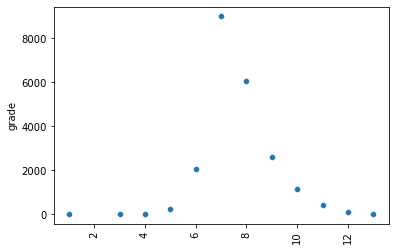

Graph for Sqft_above: Total = 946


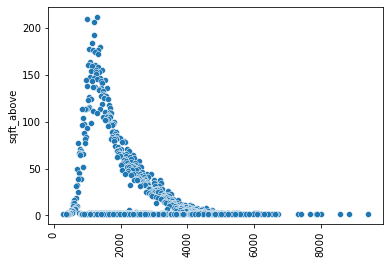

Graph for Sqft_basement: Total = 306


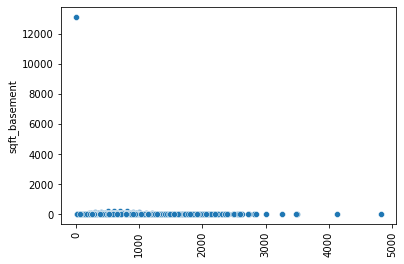

Graph for Yr_built: Total = 116


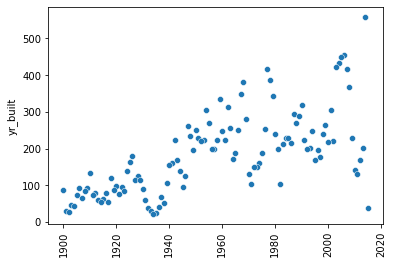

Graph for Yr_renovated: Total = 70


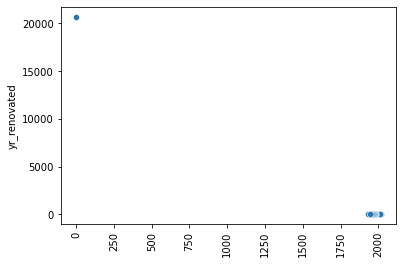

Graph for Zipcode: Total = 70


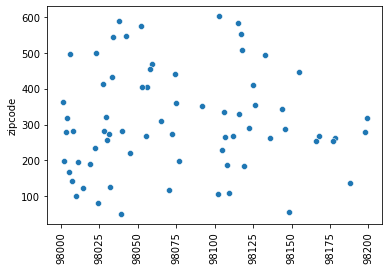

Graph for Lat: Total = 5034


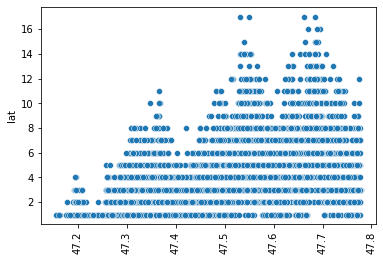

Graph for Long: Total = 752


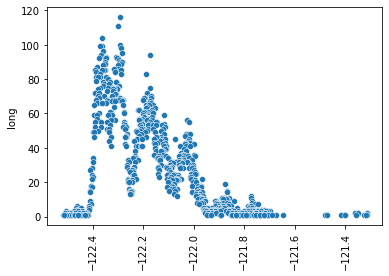

Graph for Sqft_living15: Total = 777


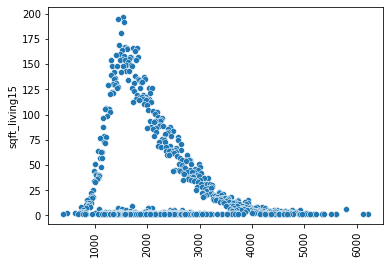

Graph for Sqft_lot15: Total = 8689


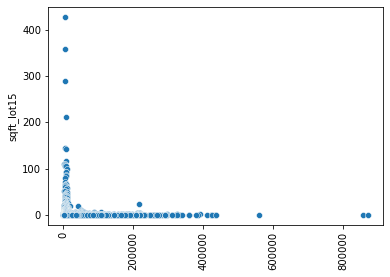

In [168]:
# Function to plot scatterplots

def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print('Graph for {}: Total = {}'.format(i.capitalize(), len(cat_num)))
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
plot_scatterplots()

In [169]:
# remove outliers for price (over 4mil)

house_data = house_data[house_data.price < 4000000]

In [170]:
# remove outliers for bedrooms (0, 10, 11, 33) a house with 0 makes no sense and anything >= 10 is rare

house_data = house_data[house_data.bedrooms < 10]
house_data = house_data[house_data.bedrooms > 0]

In [171]:
# remove outliers for bathrooms (0) makes no sense if a house has none

house_data = house_data[house_data.bathrooms  > 0]

In [172]:
# convert those with yr_renovated == 0 to yr_built

house_data["yr_renovated"] = [house_data.iloc[i]["yr_renovated"].item() if house_data.iloc[i]["yr_renovated"].item() > 0 else house_data.iloc[i]["yr_built"].item() for i in range(len(house_data))]
# house_data.drop(["yr_renovated"], axis=1, inplace=True)
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

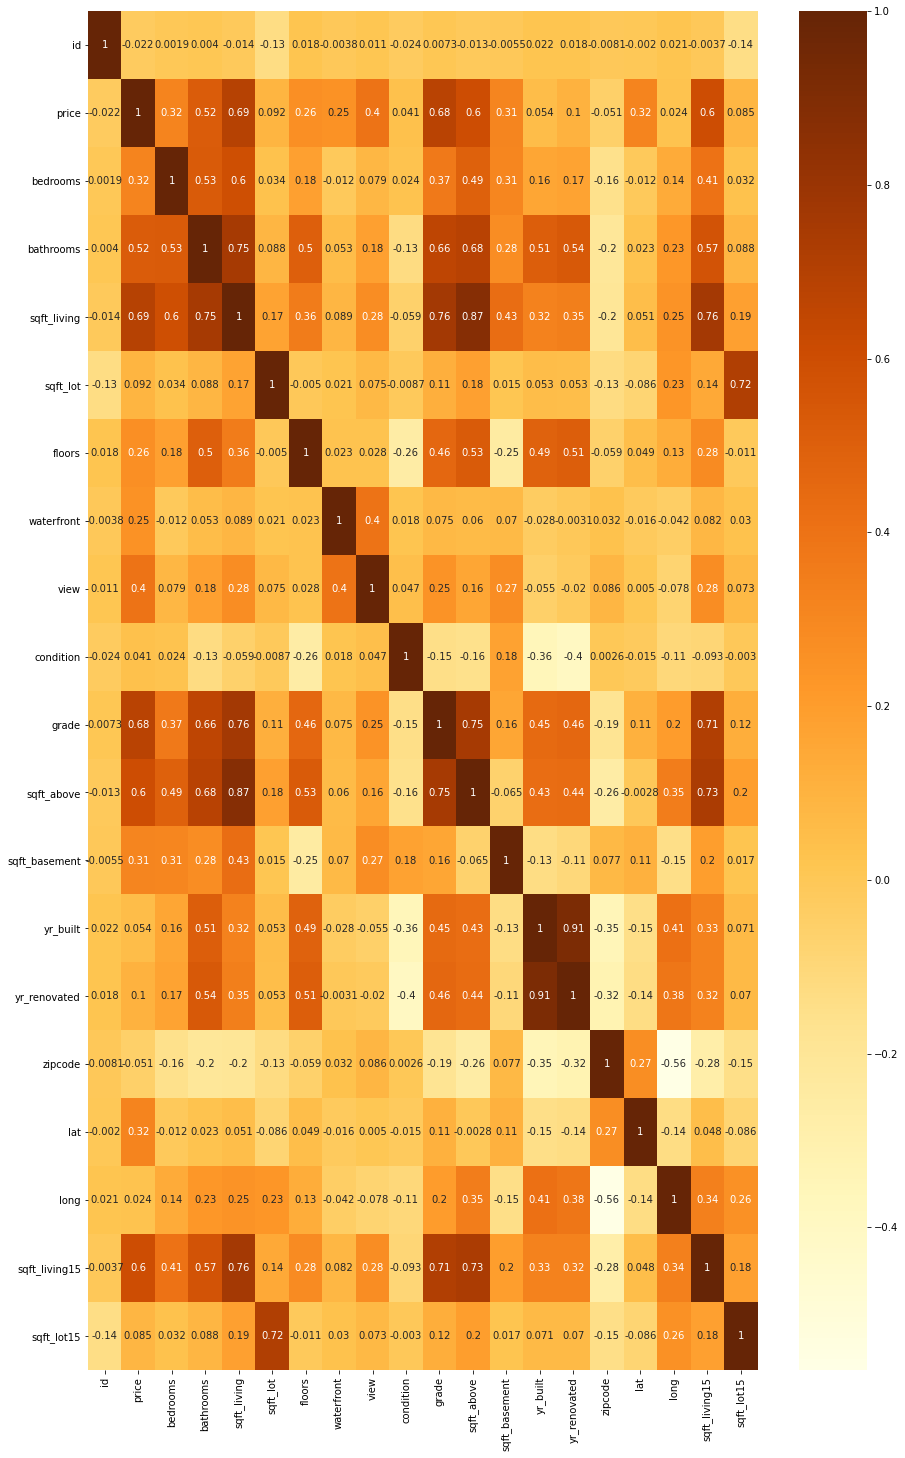

In [173]:
plt.figure(figsize=(15,25))
sns.heatmap(house_data.corr(), cmap='YlOrBr', annot=True)

In [174]:
house_data.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.694169
grade            0.677954
sqft_above       0.598528
sqft_living15    0.597643
bathrooms        0.520704
view             0.397441
lat              0.320167
bedrooms         0.319325
sqft_basement    0.312332
floors           0.264197
waterfront       0.248995
yr_renovated     0.104396
sqft_lot         0.092248
sqft_lot15       0.084846
yr_built         0.054020
condition        0.040500
long             0.024469
id              -0.022166
zipcode         -0.051256
Name: price, dtype: float64

In [175]:
# filter and create a new df for crime incidences that occurred since 2000

filtered_incidences = []
for i in range(len(incident_data["incident_datetime"])):
    curr_datetime = incident_data["incident_datetime"][i]
    datetime_split = curr_datetime.split()
    curr_date = datetime.datetime.strptime(datetime_split[0], "%m/%d/%Y")
    if curr_date.year >= 2000 and curr_date.year <= 2015:
        curr_row = incident_data.iloc[i]
        temp = [curr_date.year, curr_row["zip"]]
        filtered_incidences.append(temp)
filtered_incidences_df = pd.DataFrame(filtered_incidences, columns=["year", "zip"])

In [176]:
def add_to_dict(dict_add, key):
    if key not in dict_add:
        dict_add[key] = 1
    else:
        dict_add[key] += 1

In [177]:
# create ref dict for cumulative crime numbers per year and zipcode

filtered_dict = {2014:{}, 2015:{}}
for i in range(len(filtered_incidences_df)):
    year, zip_code = filtered_incidences_df.iloc[i]["year"], filtered_incidences_df.iloc[i]["zip"]
    if not math.isnan(float(zip_code)):
        if year == 2015:
            add_to_dict(filtered_dict[2015], zip_code)
        else:
            add_to_dict(filtered_dict[2014], zip_code)
            add_to_dict(filtered_dict[2015], zip_code)
filtered_dict

{2014: {'89103': 1,
  '98077': 2,
  '98058': 5,
  '98038': 2,
  '98024': 3,
  '98118': 1,
  '98144': 1,
  '98045': 1,
  '98101': 1,
  '98146': 2,
  '98065': 1,
  '98001': 5,
  '98051': 1,
  '98019': 1,
  '98168': 1,
  '98059': 1,
  '98014': 1,
  '98105': 1,
  '98106': 1,
  '98022': 1,
  '98037': 1,
  '98074': 1,
  '98070': 2,
  '98104': 1,
  '98056': 1,
  '98023': 1},
 2015: {'89103': 1,
  '98077': 2,
  '98058': 6,
  '98038': 2,
  '98024': 3,
  '98042': 1,
  '98118': 1,
  '98144': 1,
  '98045': 1,
  '98101': 1,
  '98146': 2,
  '98065': 1,
  '98001': 5,
  '98051': 1,
  '98178': 2,
  '98019': 1,
  '98168': 1,
  '98072': 1,
  '98059': 2,
  '98105': 2,
  '98014': 1,
  '98106': 1,
  '98022': 1,
  '98037': 1,
  '98074': 1,
  '98070': 2,
  '98104': 1,
  '98053': 1,
  '98056': 1,
  '98023': 1}}

In [178]:
# create copy of house data for crime numbers to be included later

house_data_with_crime = house_data.copy()
house_data_with_crime.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [179]:
# create column for no. of crimes for house data with crime numbers

crime_numbers = []
for i in range(len(house_data_with_crime)):
    date, zip_code = house_data_with_crime.iloc[i]["date"], str(house_data_with_crime.iloc[i]["zipcode"])
    curr_year = datetime.datetime.strptime(date, "%Y%m%d").year
    if zip_code not in filtered_dict[curr_year]:
        crime_numbers.append(0)
    else:
        crime_numbers.append(filtered_dict[curr_year][zip_code])
house_data_with_crime["no_of_crimes"] = crime_numbers

# can use below line to check if crime number corresponds to 98058 using ref dict (that was created earlier)
# house_data_with_crime[house_data_with_crime["zipcode"] == 98058]

In [180]:
# drop id and date for both dataframes as they do not provide much value
# (can consider implementing) however, first create columns for year, month & day before dropping date column

# house_data["date"] = pd.to_datetime(house_data["date"])
# house_data["year"] = house_data["date"].dt.year
# house_data["month"] = house_data["date"].dt.month
# house_data["day"] = house_data["date"].dt.day
# house_data_with_crime["date"] = pd.to_datetime(house_data_with_crime["date"])
# house_data_with_crime["year"] = house_data_with_crime["date"].dt.year
# house_data_with_crime["month"] = house_data_with_crime["date"].dt.month
# house_data_with_crime["day"] = house_data_with_crime["date"].dt.day
house_data.drop(["id", "date"], axis=1, inplace=True)
house_data_with_crime.drop(["id", "date"], axis=1, inplace=True)

In [181]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [182]:
house_data_with_crime.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,no_of_crimes
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503,1


In [183]:
house_data_with_crime.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.694169
grade            0.677954
sqft_above       0.598528
sqft_living15    0.597643
bathrooms        0.520704
view             0.397441
lat              0.320167
bedrooms         0.319325
sqft_basement    0.312332
floors           0.264197
waterfront       0.248995
yr_renovated     0.104396
sqft_lot         0.092248
sqft_lot15       0.084846
yr_built         0.054020
condition        0.040500
long             0.024469
zipcode         -0.051256
no_of_crimes    -0.185489
Name: price, dtype: float64

# Train Test Split

In [184]:

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**For house data w/o crime numbers**

In [185]:
X = house_data.iloc[:,1:].values
y = house_data.iloc[:,0].values

# can tune parameters accordingly for experimentation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

**For house data with crime numbers**

In [186]:
X_2 = house_data_with_crime.iloc[:,1:].values
y_2 = house_data_with_crime.iloc[:,0].values

# can tune parameters accordingly for experimentation
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=2021)

**Scaling features**

In [187]:
scaler = MinMaxScaler()

In [188]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

# Polynomial Regression

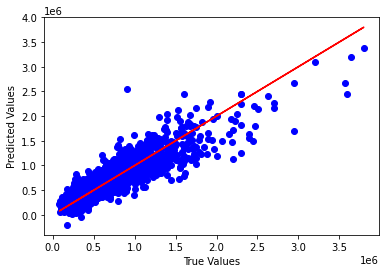

In [190]:
poly = PolynomialFeatures(degree=2)
X_poly_variables = poly.fit_transform(X)


X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly_variables, y, test_size = 0.2, random_state = 2021)


regression = LinearRegression()

poly_model = regression.fit(X_poly_train, y_poly_train)
poly_score = poly_model.score(X_poly_test, y_poly_test)
poly_predict = poly_model.predict(X_poly_test)


plt.scatter(y_poly_test, poly_predict, color = "blue")
plt.plot(y_poly_test, y_poly_test, color = "red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [191]:
print("Score: "+ str(poly_score))
print("MAE: "+str(mean_absolute_error(y_poly_test, poly_predict)))
print("MSE: "+str(mean_squared_error(y_poly_test, poly_predict)))
print("RMSE: " +str(np.sqrt(mean_squared_error(y_poly_test, poly_predict))))
print("Cross Validation Score: " +str(np.mean(cross_val_score(poly_model, X, y, cv=strat_k_fold))))

Score: 0.8181258810228327
MAE: 96766.81294009904
MSE: 21020036922.031506
RMSE: 144982.8849279511
Cross Validation Score: 0.7074940002116655


C:\Users\wei-d\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


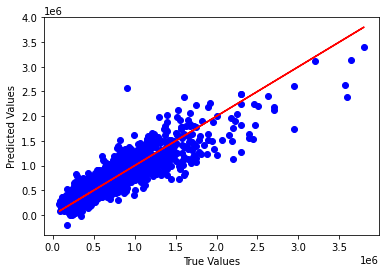

In [192]:
poly_2 = PolynomialFeatures(degree=2)
X_2_poly_variables = poly.fit_transform(X_2)


X_2_poly_train, X_2_poly_test, y_2_poly_train, y_2_poly_test = train_test_split(X_2_poly_variables, y_2, test_size = 0.2, random_state = 2021)


regression = LinearRegression()

poly_model_2 = regression.fit(X_2_poly_train, y_2_poly_train)
poly_score_2 = poly_model_2.score(X_2_poly_test, y_2_poly_test)
poly_predict_2 = poly_model_2.predict(X_2_poly_test)
# print(poly_score_2)

plt.scatter(y_2_poly_test, poly_predict_2, color = "blue")
plt.plot(y_poly_test, y_poly_test, color = "red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [193]:
print("Score: "+ str(poly_score_2))
print("MAE: "+str(mean_absolute_error(y_2_poly_test, poly_predict_2)))
print("MSE: "+str(mean_squared_error(y_2_poly_test, poly_predict_2)))
print("RMSE: " +str(np.sqrt(mean_squared_error(y_2_poly_test, poly_predict_2))))
print("Cross Validation Score: " +str(np.mean(cross_val_score(poly_model_2, X, y, cv=strat_k_fold))))

Score: 0.8197699943598736
MAE: 95546.45220646403
MSE: 20830019105.076786
RMSE: 144326.08601731283
Cross Validation Score: 0.7074940002116655


C:\Users\wei-d\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


## NN

In [194]:
len(X_train[0])

18

In [195]:
def createModel():
    NN_model = Sequential()
    # The Input Layer :
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = 18, activation='relu'))

    # The Hidden Layers :
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

    # The Output Layer :
    NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

    # Compile the network :
    NN_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    return NN_model
    # NN_model.summary()
keras_clf = KerasRegressor(build_fn=lambda:createModel(),epochs=20, batch_size=5, validation_split=0.2)

In [196]:
NN_model= createModel()
history=NN_model.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.2)
predictions = NN_model.predict(X_test)


Epoch 1/20
2763/2763 [==============================] - 4s 1ms/step - loss: 68753063936.0000 - mse: 68753063936.0000 - mae: 163292.2656 - val_loss: 38163279872.0000 - val_mse: 38163279872.0000 - val_mae: 123651.4219
Epoch 2/20
2763/2763 [==============================] - 3s 1ms/step - loss: 34119806976.0000 - mse: 34119806976.0000 - mae: 118182.6641 - val_loss: 33886027776.0000 - val_mse: 33886027776.0000 - val_mae: 112513.6328
Epoch 3/20
2763/2763 [==============================] - 3s 1ms/step - loss: 31350102016.0000 - mse: 31350099968.0000 - mae: 113412.2422 - val_loss: 31785832448.0000 - val_mse: 31785832448.0000 - val_mae: 108796.6953
Epoch 4/20
2763/2763 [==============================] - 3s 1ms/step - loss: 30178969600.0000 - mse: 30178969600.0000 - mae: 111090.6719 - val_loss: 33593061376.0000 - val_mse: 33593061376.0000 - val_mae: 108822.5312
Epoch 5/20
2763/2763 [==============================] - 3s 1ms/step - loss: 29573345280.0000 - mse: 29573339136.0000 - mae: 110025.0703 

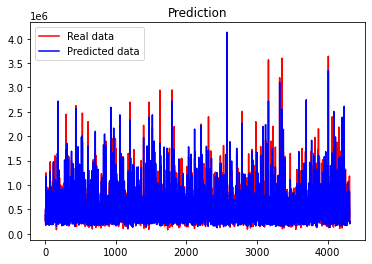

In [197]:
plt.plot(y_test,  color = 'red', label = 'Real data')
plt.plot(predictions,  color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [198]:
print("r2 Score: "+ str(r2_score(y_test, predictions)))
print("MAE: "+str(mean_absolute_error(y_test, predictions)))
print("MSE: "+str(mean_squared_error(y_test, predictions)))
print("RMSE: " +str(np.sqrt(mean_squared_error(y_test, predictions))))
print("Cross Validation Score: " +str(np.mean(cross_val_score(keras_clf, X, y,cv=strat_k_fold))))

r2 Score: 0.8241835525840697
MAE: 88585.2119747017
MSE: 20319923675.601273
RMSE: 142547.96973510802
Epoch 1/20


C:\Users\wei-d\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


2763/2763 [==============================] - 4s 1ms/step - loss: 76845252608.0000 - mse: 76845252608.0000 - mae: 186784.5156 - val_loss: 92057690112.0000 - val_mse: 92057690112.0000 - val_mae: 185929.8438
Epoch 2/20
2763/2763 [==============================] - 4s 1ms/step - loss: 59364888576.0000 - mse: 59364892672.0000 - mae: 165684.6094 - val_loss: 74996826112.0000 - val_mse: 74996834304.0000 - val_mae: 193886.8750
Epoch 3/20
2763/2763 [==============================] - 4s 1ms/step - loss: 57965916160.0000 - mse: 57965916160.0000 - mae: 162957.8438 - val_loss: 73235161088.0000 - val_mse: 73235161088.0000 - val_mae: 186495.1406
Epoch 4/20
2763/2763 [==============================] - 4s 1ms/step - loss: 57405636608.0000 - mse: 57405636608.0000 - mae: 161905.3906 - val_loss: 69229436928.0000 - val_mse: 69229436928.0000 - val_mae: 167078.0156
Epoch 5/20
2763/2763 [==============================] - 4s 1ms/step - loss: 58589159424.0000 - mse: 58589159424.0000 - mae: 162716.0781 - val_loss:

2763/2763 [==============================] - 4s 2ms/step - loss: 51191115776.0000 - mse: 51191115776.0000 - mae: 151397.2812 - val_loss: 65879851008.0000 - val_mse: 65879851008.0000 - val_mae: 159961.8750
Epoch 19/20
2763/2763 [==============================] - 4s 1ms/step - loss: 50861391872.0000 - mse: 50861391872.0000 - mae: 151015.2656 - val_loss: 65452740608.0000 - val_mse: 65452740608.0000 - val_mae: 164017.1875
Epoch 20/20
864/864 [==============================] - 1s 733us/step - loss: 55440945152.0000 - mse: 55440945152.0000 - mae: 150519.8906
Epoch 1/20
2763/2763 [==============================] - 5s 1ms/step - loss: 73094823936.0000 - mse: 73094823936.0000 - mae: 184590.3594 - val_loss: 72951291904.0000 - val_mse: 72951291904.0000 - val_mae: 168298.8750
Epoch 2/20
2763/2763 [==============================] - 4s 1ms/step - loss: 58495242240.0000 - mse: 58495242240.0000 - mae: 165695.0781 - val_loss: 64826134528.0000 - val_mse: 64826134528.0000 - val_mae: 168071.1406
Epoch 3/2

Epoch 15/20
2763/2763 [==============================] - 4s 1ms/step - loss: 53685211136.0000 - mse: 53685211136.0000 - mae: 153864.1406 - val_loss: 71058087936.0000 - val_mse: 71058087936.0000 - val_mae: 179248.5938
Epoch 16/20
2763/2763 [==============================] - 4s 1ms/step - loss: 53177733120.0000 - mse: 53177733120.0000 - mae: 152999.8281 - val_loss: 65216811008.0000 - val_mse: 65216815104.0000 - val_mae: 166915.3750
Epoch 17/20
2763/2763 [==============================] - 4s 1ms/step - loss: 53483233280.0000 - mse: 53483233280.0000 - mae: 153892.7188 - val_loss: 66443427840.0000 - val_mse: 66443427840.0000 - val_mae: 174202.6406
Epoch 18/20
2763/2763 [==============================] - 4s 1ms/step - loss: 53468622848.0000 - mse: 53468622848.0000 - mae: 153038.5938 - val_loss: 69234008064.0000 - val_mse: 69234008064.0000 - val_mae: 161882.9062
Epoch 19/20
2763/2763 [==============================] - 4s 1ms/step - loss: 53192482816.0000 - mse: 53192482816.0000 - mae: 153285.

In [79]:
mean_absolute_error(y_test, predictions)

92209.12676306187

In [80]:
mean_squared_error(y_test, predictions)

20246268706.70209

In [81]:
math.sqrt(mean_squared_error(y_test, predictions))

142289.38367531885

In [82]:
np.mean(y_test)

535205.2794253939

In [83]:
np.mean(predictions)

562497.25

In [84]:
r2_score(y_test, predictions)

0.8248208460686872

In [199]:
def createModel2():
    NN_model2 = Sequential()
    # The Input Layer :
    NN_model2.add(Dense(128, kernel_initializer='normal',input_dim = 19, activation='relu'))

    # The Hidden Layers :
    NN_model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model2.add(Dense(256, kernel_initializer='normal',activation='relu'))

    # The Output Layer :
    NN_model2.add(Dense(1, kernel_initializer='normal',activation='linear'))

    # Compile the network :
    NN_model2.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
#     NN_model2.summary()
    return NN_model2
keras_clf_2 = KerasRegressor(build_fn=lambda:createModel(),epochs=20, batch_size=5, validation_split=0.2)


In [200]:
NN_model2 = createModel2()
history_2 = NN_model2.fit(X_train_2, y_train_2, epochs=20, batch_size=5, validation_split=0.2)
predictions_2 = NN_model2.predict(X_test_2)

Epoch 1/20
2763/2763 [==============================] - 4s 1ms/step - loss: 68869505024.0000 - mse: 68869505024.0000 - mae: 160451.9062 - val_loss: 36327616512.0000 - val_mse: 36327616512.0000 - val_mae: 117922.2500
Epoch 2/20
2763/2763 [==============================] - 3s 1ms/step - loss: 33167247360.0000 - mse: 33167247360.0000 - mae: 116020.7266 - val_loss: 35181936640.0000 - val_mse: 35181936640.0000 - val_mae: 114676.1172
Epoch 3/20
2763/2763 [==============================] - 3s 1ms/step - loss: 30629306368.0000 - mse: 30629306368.0000 - mae: 111448.3047 - val_loss: 30767247360.0000 - val_mse: 30767247360.0000 - val_mae: 107773.5781
Epoch 4/20
2763/2763 [==============================] - 3s 1ms/step - loss: 29762437120.0000 - mse: 29762437120.0000 - mae: 109942.3125 - val_loss: 30966863872.0000 - val_mse: 30966863872.0000 - val_mae: 111274.9609
Epoch 5/20
2763/2763 [==============================] - 3s 1ms/step - loss: 29066123264.0000 - mse: 29066123264.0000 - mae: 108045.0703 

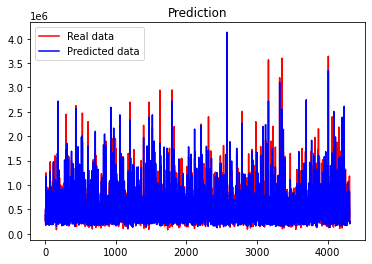

In [201]:
plt.plot(y_test,  color = 'red', label = 'Real data')
plt.plot(predictions,  color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [202]:
print("r2 Score: "+ str(r2_score(y_test, predictions_2)))
print("MAE: "+str(mean_absolute_error(y_test, predictions_2)))
print("MSE: "+str(mean_squared_error(y_test, predictions_2)))
print("RMSE: " +str(np.sqrt(mean_squared_error(y_test, predictions_2))))
print("Cross Validation Score: " +str(np.mean(cross_val_score(keras_clf_2, X, y,cv=strat_k_fold))))

r2 Score: 0.8000904069218697
MAE: 97221.45742947752
MSE: 23104480457.15691
RMSE: 152001.5804429576
Epoch 1/20


C:\Users\wei-d\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


2763/2763 [==============================] - 4s 1ms/step - loss: 76269166592.0000 - mse: 76269166592.0000 - mae: 185139.8281 - val_loss: 67788255232.0000 - val_mse: 67788255232.0000 - val_mae: 174404.6406
Epoch 2/20
2763/2763 [==============================] - 4s 1ms/step - loss: 59752808448.0000 - mse: 59752808448.0000 - mae: 166566.6250 - val_loss: 83693993984.0000 - val_mse: 83693985792.0000 - val_mae: 213129.7812
Epoch 3/20
2763/2763 [==============================] - 4s 1ms/step - loss: 58618351616.0000 - mse: 58618351616.0000 - mae: 164299.1719 - val_loss: 69143257088.0000 - val_mse: 69143257088.0000 - val_mae: 170502.4844
Epoch 4/20
2763/2763 [==============================] - 4s 1ms/step - loss: 56893321216.0000 - mse: 56893321216.0000 - mae: 161894.9844 - val_loss: 73844563968.0000 - val_mse: 73844563968.0000 - val_mae: 177686.5000
Epoch 5/20
2763/2763 [==============================] - 4s 1ms/step - loss: 56461914112.0000 - mse: 56461914112.0000 - mae: 159193.9531 - val_loss:

2763/2763 [==============================] - 4s 1ms/step - loss: 51490914304.0000 - mse: 51490914304.0000 - mae: 152223.3281 - val_loss: 65995104256.0000 - val_mse: 65995104256.0000 - val_mae: 171593.0312
Epoch 19/20
2763/2763 [==============================] - 4s 1ms/step - loss: 50485927936.0000 - mse: 50485927936.0000 - mae: 150300.8125 - val_loss: 65017085952.0000 - val_mse: 65017077760.0000 - val_mae: 168162.7500
Epoch 20/20
864/864 [==============================] - 1s 750us/step - loss: 55742873600.0000 - mse: 55742873600.0000 - mae: 149935.8750
Epoch 1/20
2763/2763 [==============================] - 4s 1ms/step - loss: 76083412992.0000 - mse: 76083412992.0000 - mae: 186587.9844 - val_loss: 66601873408.0000 - val_mse: 66601873408.0000 - val_mae: 173774.2500
Epoch 2/20
2763/2763 [==============================] - 4s 1ms/step - loss: 59428868096.0000 - mse: 59428868096.0000 - mae: 166706.3281 - val_loss: 65814458368.0000 - val_mse: 65814458368.0000 - val_mae: 168655.7031
Epoch 3/2

Epoch 15/20
2763/2763 [==============================] - 4s 1ms/step - loss: 54136139776.0000 - mse: 54136139776.0000 - mae: 154516.4062 - val_loss: 65245245440.0000 - val_mse: 65245245440.0000 - val_mae: 164891.5625
Epoch 16/20
2763/2763 [==============================] - 4s 1ms/step - loss: 54048239616.0000 - mse: 54048239616.0000 - mae: 154815.8438 - val_loss: 66271490048.0000 - val_mse: 66271490048.0000 - val_mae: 161431.5156
Epoch 17/20
2763/2763 [==============================] - 4s 1ms/step - loss: 53587898368.0000 - mse: 53587898368.0000 - mae: 153879.0625 - val_loss: 65638002688.0000 - val_mse: 65638002688.0000 - val_mae: 167252.5312
Epoch 18/20
2763/2763 [==============================] - 4s 1ms/step - loss: 53529399296.0000 - mse: 53529399296.0000 - mae: 153991.0781 - val_loss: 68233625600.0000 - val_mse: 68233625600.0000 - val_mae: 180609.5625
Epoch 19/20
2763/2763 [==============================] - 4s 1ms/step - loss: 53094846464.0000 - mse: 53094846464.0000 - mae: 153796.

In [203]:
mean_absolute_error(y_test, predictions_2)

97221.45742947752

In [89]:
mean_squared_error(y_test, predictions_2)
math.sqrt(mean_squared_error(y_test, predictions_2))

145037.05244638294

In [90]:
np.mean(y_test)

535205.2794253939

In [91]:
np.mean(predictions_2)

493008.9

In [92]:
r2_score(y_test, predictions_2)

0.8179899544953153